In [455]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
import matplotlib
import seaborn as sns
%matplotlib inline 





In [456]:
pf = pd.read_csv("listings.csv")

Quel sont les pourcentages d'acceptation et de réponse moyen des host ?

In [457]:
pf.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [458]:
listGroupbyNeight =  pf.groupby(pf.neighbourhood_group_cleansed)
listGroupbyNeight.host_id.nunique()


neighbourhood_group_cleansed
Ambars-et-Lagrave               65
Ambs                            49
Artigues-Prs-Bordeaux           91
Bassens                         30
Bgles                          375
Blanquefort                     97
Bordeaux                      4622
Bouliac                         72
Bruges                         163
Carbon-Blanc                    42
Cenon                          203
Eysines                        133
Floirac                        122
Gradignan                      159
Le Bouscat                     270
Le Haillan                      43
Le Taillan-Mdoc                 68
Lormont                        118
Martignas-sur-Jalle             58
Merignac                       518
Parempuyre                      51
Pessac                         427
Saint-Aubin-de-Mdoc             80
Saint-Louis-de-Montferrand      12
Saint-Mdard-en-Jalles          188
Saint-Vincent-de-Paul           28
Talence                        429
Villenave-d'Ornon         

In [459]:
jp = listGroupbyNeight.number_of_reviews.sum()

In [460]:
jp.to_csv("nbhost.csv")

In [461]:
jpp = listGroupbyNeight.number_of_reviews.count()

In [462]:
jpp.to_csv("nb_review.csv")

ON A DONC LA REPONSE A LA QUESTION 1

In [563]:
truc = pf[["room_type","amenities"]]
truc.amenities = truc.amenities.astype("string")
truc["lenght"] = truc.amenities.str.count(",")
truc["lenght"] = truc.lenght.astype(int)
truc["lenght"] = truc.lenght.apply(lambda x:x+1)

/tmp/ipykernel_79782/2154159068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truc.amenities = truc.amenities.astype("string")
/tmp/ipykernel_79782/2154159068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truc["lenght"] = truc.amenities.str.count(",")
/tmp/ipykernel_79782/2154159068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [558]:
q1 = truc.groupby("room_type").mean()

/tmp/ipykernel_79782/3601735976.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  q1 = truc.groupby("room_type").mean()


In [ ]:
q1.to_csv("premiere_question.csv")

In [ ]:
q1_2 = truc.groupby("room_type").std() 
q1_2.to_csv("premierequestiond.csv")

In [ ]:
listingPrice = pf[["room_type","price"]]
listingPrice["price"] = listingPrice["price"].str.replace("$","").str.replace(",","").astype("float")
quartile_et_autre = listingPrice.groupby(listingPrice.room_type).describe()

/tmp/ipykernel_79782/2103419292.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listingPrice["price"] = listingPrice["price"].str.replace("$","").str.replace(",","").astype("float")
/tmp/ipykernel_79782/2103419292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingPrice["price"] = listingPrice["price"].str.replace("$","").str.replace(",","").astype("float")


In [ ]:
quartile_et_autre

VOICI LA REPONSE A :Quel est le prix median par type de room, le maximum, le minimum, le premier et le troisième quartile?

In [ ]:
quartile_et_autre.to_csv("quartile_et_autre.csv")

In [ ]:
pf.host_acceptance_rate.str.rstrip("%").astype(float).mean()

In [ ]:
pf.host_response_rate.str.rstrip("%").astype(float).mean()

In [ ]:
pf.replace(to_replace="work_email", value='work', regex=True,inplace=True)

In [ ]:
listingPhone =  pf["host_verifications"].apply( lambda x : 1 if "phone" in x else 0).sum()



listingWorkEmail = pf["host_verifications"].apply( lambda x : 1 if "work" in x else 0).sum()


listingEmail = pf["host_verifications"].apply( lambda x : 1 if "email" in x else 0).sum()



ON PASSE A LA QUESTION SUR LES BATHS 

In [ ]:
pf.bathrooms_text.unique()

In [466]:
pf.bathrooms_text = pf.bathrooms_text.astype("string")

In [469]:
pf.bathrooms_text.dtypes

string[python]

In [470]:
pf.dropna(subset = ['bathrooms_text'])

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,579652405189065070,https://www.airbnb.com/rooms/579652405189065070,20220912200234,2022-09-12,city scrape,Appartement cosy dans centre historique de Bourg,"Dans le centre historique de Bourg, idéalement...",Vous vous situez dans le centre historique de ...,https://a0.muscache.com/pictures/miso/Hosting-...,15134863,...,5.00,5.00,4.93,NaN,t,1,1,0,0,2.74
1,49797548,https://www.airbnb.com/rooms/49797548,20220912200234,2022-09-12,city scrape,Maison de vacances entre Bordeaux et le Bassin,Villa moderne idéalement située entre Bordeaux...,Ballades à pied ou à vélo dans la foret: 5 vél...,https://a0.muscache.com/pictures/miso/Hosting-...,83677621,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.21
2,218103,https://www.airbnb.com/rooms/218103,20220912200234,2022-09-13,city scrape,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,...,4.96,4.57,4.54,NaN,f,4,4,0,0,0.44
3,1117474,https://www.airbnb.com/rooms/1117474,20220912200234,2022-09-13,city scrape,INCROYABLE T3 EN HYPERCENTRE,<b>The space</b><br />In the heart of the hist...,NaN,https://a0.muscache.com/pictures/20359851/80f7...,6133211,...,4.88,4.93,4.80,330630009852A,f,1,1,0,0,3.31
4,1136724,https://www.airbnb.com/rooms/1136724,20220912200234,2022-09-12,city scrape,"Spacious house, 4 guests with Garden & Garage","BOOK A STREET ART HOUSE! Cozy, colorful and cl...",NaN,https://a0.muscache.com/pictures/b876925a-2b69...,3774373,...,4.91,4.62,4.70,33063003349C9,t,4,4,0,0,4.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,591221838086690180,https://www.airbnb.com/rooms/591221838086690180,20220912200234,2022-09-13,previous scrape,Maison chaleureuse avec piscine près de Bordeaux,Bienvenue dans notre maison ! <br />C'est notr...,Nous sommes situés à 20 min de la gare de bord...,https://a0.muscache.com/pictures/miso/Hosting-...,5220890,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
10881,50594474,https://www.airbnb.com/rooms/50594474,20220912200234,2022-09-13,city scrape,Le clos des vignes****,À 20 minutes de Bordeaux et à 3 minutes des so...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,408562043,...,4.95,4.74,4.83,NaN,f,2,2,0,0,5.73
10882,556379338554707629,https://www.airbnb.com/rooms/556379338554707629,20220912200234,2022-09-13,city scrape,escale gourmande au coeur des vignobles,studio independant comportant:<br /><br /> une...,quartier calme ambiance vigne et campagne à 2 ...,https://a0.muscache.com/pictures/6349e9f7-cdce...,62440676,...,4.77,4.73,4.64,NaN,t,3,2,1,0,6.11
10883,16789721,https://www.airbnb.com/rooms/16789721,20220912200234,2022-09-13,previous scrape,Logement aux portes de Bordeaux et de l'océan,"Situé au départ de la route des châteaux, à 10...",Quartier calme,https://a0.muscache.com/pictures/miso/Hosting-...,111565429,...,5.00,4.88,4.88,NaN,t,1,1,0,0,0.26


In [471]:
pf["Bath"] = pf["bathrooms_text"]


In [472]:
pf["Bath"].unique()

<StringArray>
[        '1.5 baths',           '3 baths',            '1 bath',
    '1 private bath',                <NA>,           '2 baths',
     '1 shared bath',  'Shared half-bath',           '4 baths',
           '8 baths',           '5 baths',         '4.5 baths',
         '2.5 baths',           '0 baths',  '1.5 shared baths',
         '3.5 baths',         'Half-bath',    '3 shared baths',
           '6 baths',         '5.5 baths',           '7 baths',
    '0 shared baths',  '2.5 shared baths', 'Private half-bath',
    '2 shared baths',         '6.5 baths',    '4 shared baths',
        '11.5 baths',         '7.5 baths']
Length: 29, dtype: string

In [473]:
pf["Bath"] = pf["Bath"].str.replace("baths","bath")

In [474]:
pf["Bath"] = pf["Bath"].str.lower()

In [475]:
# pf[["nb","type"]] = pf["Bath"].str.split(" ",1,expand=True)

In [476]:
pf["Bath"] = pf["Bath"].str.replace("private bath","2")

In [477]:
pf["Bath"] = pf["Bath"].str.replace("shared half-bath","1 0.25")

In [478]:
pf["Bath"] = pf["Bath"].str.replace("private half-bath","1 1")

In [479]:
pf["Bath"] = pf["Bath"].str.replace("half-bath","1 0.5")

In [480]:
pf["Bath"] = pf["Bath"].str.replace("shared bath","0.5")

In [481]:
pf["Bath"] = pf["Bath"].str.replace("bath","1")

In [ ]:
#pf["Bath"] = pf["Bath"].str.replace("half-bath","0.5-")

In [482]:
pf["Bath"].dropna()

0        1.5 1
1          3 1
2          1 1
3          1 1
4          1 1
         ...  
10880      2 1
10881      1 1
10882      1 1
10883      1 1
10884      1 1
Name: Bath, Length: 10876, dtype: string

In [483]:
pf.Bath.dropna().unique()

<StringArray>
[  '1.5 1',     '3 1',     '1 1',     '1 2',     '2 1',   '1 0.5',  '1 0.25',
     '4 1',     '8 1',     '5 1',   '4.5 1',   '2.5 1',     '0 1', '1.5 0.5',
   '3.5 1',   '3 0.5',     '6 1',   '5.5 1',     '7 1',   '0 0.5', '2.5 0.5',
   '2 0.5',   '6.5 1',   '4 0.5',  '11.5 1',   '7.5 1']
Length: 26, dtype: string

In [484]:
pf[["nb","type"]] = pf["Bath"].str.split(" ",1,expand=True)

/tmp/ipykernel_79782/548100858.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  pf[["nb","type"]] = pf["Bath"].str.split(" ",1,expand=True)


In [485]:
pfNb = pf.nb.dropna()
pfNb

0        1.5
1          3
2          1
3          1
4          1
        ... 
10880      2
10881      1
10882      1
10883      1
10884      1
Name: nb, Length: 10876, dtype: string

In [486]:
pf["Bath"].unique()

<StringArray>
[  '1.5 1',     '3 1',     '1 1',     '1 2',      <NA>,     '2 1',   '1 0.5',
  '1 0.25',     '4 1',     '8 1',     '5 1',   '4.5 1',   '2.5 1',     '0 1',
 '1.5 0.5',   '3.5 1',   '3 0.5',     '6 1',   '5.5 1',     '7 1',   '0 0.5',
 '2.5 0.5',   '2 0.5',   '6.5 1',   '4 0.5',  '11.5 1',   '7.5 1']
Length: 27, dtype: string

In [ ]:
pfType = pf.type.dropna()
pfType

In [487]:
pf["nb"]=pf["nb"].astype(float)
pf["type"]=pf["type"].astype(float)

In [543]:
pf["value_bath"] = pf["nb"]*pf["type"]

/tmp/ipykernel_79782/307847141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf["value_bath"] = pf["nb"]*pf["type"]


In [ ]:
listGroupbyNeight =  pf.groupby(pf.neighbourhood_group_cleansed)
listGroupbyNeight.host_id.nunique()


neighbourhood_group_cleansed
Ambars-et-Lagrave               65
Ambs                            49
Artigues-Prs-Bordeaux           91
Bassens                         30
Bgles                          375
Blanquefort                     97
Bordeaux                      4622
Bouliac                         72
Bruges                         163
Carbon-Blanc                    42
Cenon                          203
Eysines                        133
Floirac                        122
Gradignan                      159
Le Bouscat                     270
Le Haillan                      43
Le Taillan-Mdoc                 68
Lormont                        118
Martignas-sur-Jalle             58
Merignac                       518
Parempuyre                      51
Pessac                         427
Saint-Aubin-de-Mdoc             80
Saint-Louis-de-Montferrand      12
Saint-Mdard-en-Jalles          188
Saint-Vincent-de-Paul           28
Talence                        429
Villenave-d'Ornon         

In [535]:
lesbath= pf.nb.groupby(pf.value_bath).count()

AttributeError: 'DataFrame' object has no attribute 'popo'

VOICI LA REPONSE A LA QUESTION SUR LES BATHS

In [ ]:
lesbath.to_csv("lesbath.csv")

ON A ENFIN NOTRE REPONSE

In [ ]:
pf.columns

on se demande si il y a une correlation entre la taille de la description et le nombre de reviews

In [ ]:
pf.nb

In [ ]:
pf.description

In [512]:
pf["description"] = pf.description.astype("string")

In [513]:
pf = pf.dropna(subset=['description'])

In [514]:
pf["lenghth"] = pf.description.apply(len)

/tmp/ipykernel_79782/320712926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf["lenghth"] = pf.description.apply(len)


In [ ]:
pf["lenghth"].unique()

In [ ]:
pf.number_of_reviews.corr(pf["lenghth"])

VOICI NOTRE REPONSE POUR LA CORROLATION


il y a une légère corrolation 

In [ ]:
pf.name

In [ ]:
pf.info()


On suspecte des faux commentaires. Pour identifier cela on regarde les séjours où le nom de l’host est le même que le nom du reviewer. Quel est ce pourcentage général de séjour où le nom de l'host est identique au nom du reviewer?

comme on a pas le nom du reviewer dans listing , mais dans reviews , on va devoir "merge" listingsB et reviews 

In [ ]:
revdf = pd.read_csv("reviewsdet.csv")

In [ ]:
pf["comments"]= pf["description"]

In [ ]:
revdf.columns

In [ ]:
revdf.reviewer_id

In [ ]:
pp = pf.merge(revdf, left_on='id', right_on='listing_id')  

In [ ]:
tricheur = pp[pp['host_name']==pp['reviewer_name']].shape[0]

In [ ]:
tricheur

In [ ]:
equal_percent = tricheur/pp.shape[0]*100  

In [ ]:
pp.shape[0]

In [ ]:
equal_percent

In [ ]:
pf

In [ ]:
pf.host_acceptance_rate

In [ ]:
pf.number_of_reviews

In [ ]:
pf['host_response_rate'] = pd.to_numeric(pf['host_response_rate'], errors='coerce')

In [ ]:
listingPhone

In [ ]:
listingWorkEmail

In [ ]:
listingEmail

In [ ]:
y = np.array([listingPhone,listingEmail,listingWorkEmail,])
mylabels = ["PhoneVerification:10808", "EmailVerification:10010", "WorkEmailverification:702",]

plt.pie(y, labels = mylabels)

plt.show()

In [ ]:
pf.host_acceptance_rate.dtypes

In [ ]:
pf.host_acceptance_rate.str.rstrip("%").astype(float).mean()


In [ ]:
pf.host_response_rate.str.rstrip("%").astype(float).mean()

In [ ]:
pf.drop(['host_id',"scrape_id"], axis=1)

In [ ]:
y = np.array([listingPhone,listingEmail,listingWorkEmail,])
mylabels = ["PhoneVerification:10808", "EmailVerification:10010", "WorkEmailverification:702",]

plt.pie(y, labels = mylabels)

plt.show()

In [ ]:
ap = pf.describe()

In [ ]:
ap.dtypes

In [ ]:
y = np.array([listingPhone,listingEmail,listingWorkEmail,])
mylabels = ["PhoneVerification:10808", "EmailVerification:10010", "WorkEmailverification:702",]

plt.pie(y, labels = mylabels)

plt.show()

In [ ]:
pf.info()

In [ ]:
pf.neighbourhood_group_cleansed

In [ ]:
sns.barplot(y = pf.neighbourhood_group_cleansed,
            x = pf.number_of_reviews,
            data = pf)
 
# Show the plot
plt.show()

In [ ]:
pf.columns

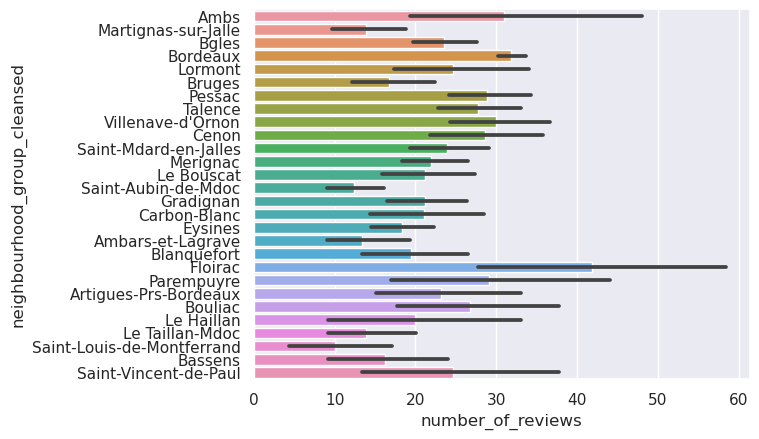

In [529]:
sns.barplot(y = pf.neighbourhood_group_cleansed,
            x = pf.number_of_reviews,
            data = pf)
 
# Show the plot
plt.show()

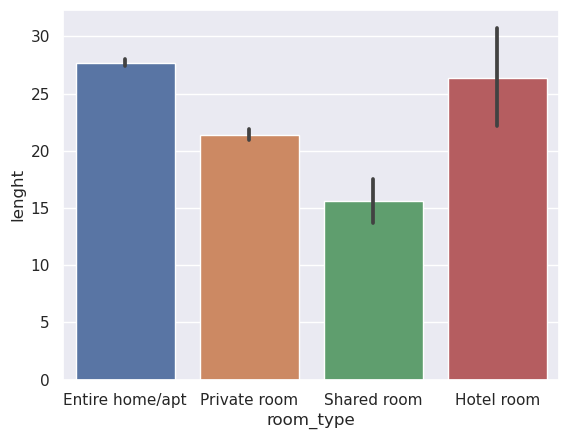

In [567]:
ax =sns.barplot(x = truc.room_type,
            y = truc.lenght,
            data = truc,
            )
 

plt.show()

In [ ]:
pf.price.unique()

In [ ]:
pf.price.u

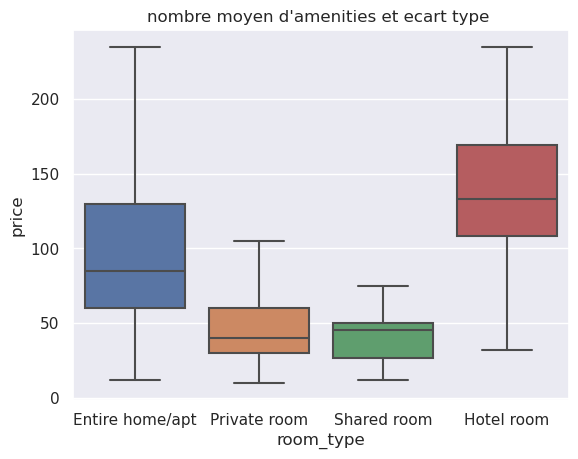

In [547]:
sns.boxplot( x=pf["room_type"], y=listingPrice["price"],showfliers = False )
plt.title("nombre moyen d'amenities et ecart type ")
plt.show()

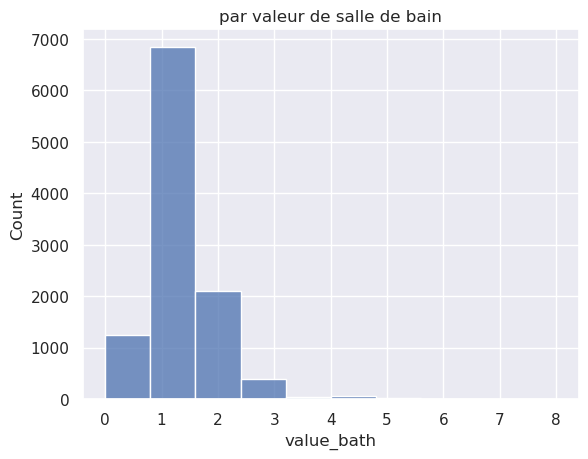

In [544]:
sns.histplot(data=pf, x=pf.value_bath, bins=10)
plt.title("par valeur de salle de bain")
plt.show()

In [517]:
pf["contribue"]= pf.number_of_reviews/2

/tmp/ipykernel_79782/3933248058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pf["contribue"]= pf.number_of_reviews/2


<AxesSubplot:xlabel='contribue', ylabel='number_of_reviews'>

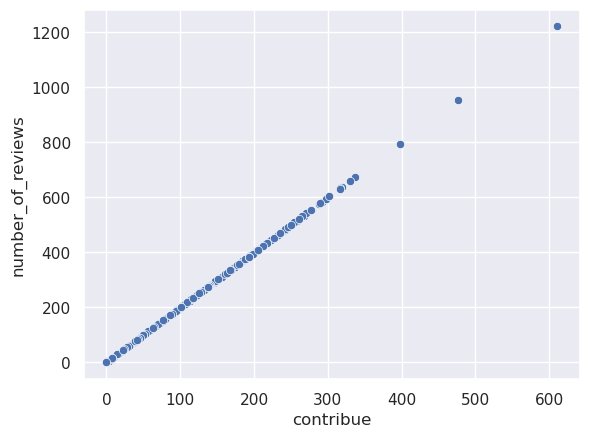

In [518]:
sns.scatterplot(data = pf, y = pf.number_of_reviews, x = pf.contribue)

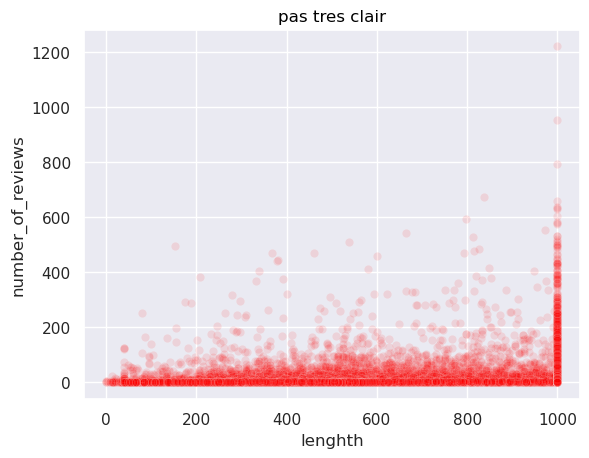

In [526]:
sns.scatterplot(data = pf,alpha = 0.1,color = "red", y = pf.number_of_reviews, x = pf.lenghth)
plt.title("pas tres clair",color = "black" )
plt.show()